In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

## Rosbank ML Competition

Ссылка на соревнование: https://boosters.pro/champ_15

Росбанк – часть ведущей международной финансовой группы Societe Generale, банк включен ЦБ РФ в число 11 системно значимых кредитных организаций России. Инновации неотъемлемый процесс работы Росбанка, поэтому активно развивается направленный анализа больших данных.

- Данные

Датасет, который содержит историю транзакций клиентов за 3 месяца льготного использования банковского продукта

- Задача

Задача бинарной классификации – прогноз оттока клиентов

Колонка cl_id содержит вутренний id клиента. Для каждого уникальнго cl_id следует предсказать продолжит ли клиент пользоваться продуктом (target_flag). Значение 0 соответствует отказу, а значение 1 соответствует продолжению использования

In [3]:
raw_df = pd.read_csv('rosbank_train.csv')
raw_df.head(5)
# target_sum - можно выкинуть, переменная участвует в другой задаче

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490513 entries, 0 to 490512
Data columns (total 10 columns):
PERIOD          490513 non-null object
cl_id           490513 non-null int64
MCC             490513 non-null int64
channel_type    487603 non-null object
currency        490513 non-null int64
TRDATETIME      490513 non-null object
amount          490513 non-null float64
trx_category    490513 non-null object
target_flag     490513 non-null int64
target_sum      490513 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 37.4+ MB


In [4]:
print("Total clients: ", len(raw_df.cl_id.unique()))

Total clients:  5000


Всего 5000 клиентов, случайным образом возьмем 1000 клиентов для тестирования

In [4]:
cl_ids_test = np.random.choice(raw_df.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)

In [5]:
# create transactions dataset for train
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))
# create transactions dataset for test
transactions_test = raw_df[raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in test dataset: ", len(transactions_test))

Total transactions in train dataset:  393332
Total transactions in test dataset:  97181


## Домашняя работа

1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test
2. Для каждого cl_id будет уникальное целевое событие target_flag, а также уникальный канал привлечения клиента channel_type (клиент привлекается лишь однажды и с самого начала его записи присваивается значение канала привлечения)
3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи, идеи для таких фичей могут быть следующими:

    - общая сумма транзакций по каждой из trx_category
    - общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро - предположительно, это будут самые крупные категории)
    - общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). ВНИМАНИ! Некоторые MCC коды из train могут быть не представлены в test. Про MCC коды в целом: http://www.banki.ru/wikibank/mcc-kod/; Справочник MCC кодов: https://mcc-codes.ru/code; Про некоторые категории кэшбека Росбанка: https://mcc-codes.ru/card/rosbank-sverkh-plus;
    - возможные агрегации по времени суток и дням недели - траты в выходные (праздники) или будни, в ночное время или в рабочее и т.д.
4. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи
5. **Дополнительная часть**: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. **Метрика оценки качества - ROC AUC**(https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
6. Задания принимаются в виде ноутбука с кодов/картинками выполненной обязательной части

При возникновении вопросов и для отправки домашнего задания - egsachko@gmail.com или http://fb.com/sachkoe
    

## Практика

In [6]:
raw_df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [48]:
raw_df_grouped = raw_df[
    ['cl_id', 'amount', 'MCC']
].groupby(['cl_id', 'MCC']).agg(['sum', 'count'])

# aggregated_dataset =  cde3sraw_df_grouped.unstack().fillna(0)
aggregated_dataset = raw_df_grouped.unstack()

In [49]:
raw_df_grouped.head()

amount      
                sum count
cl_id MCC                
0     5200   5023.0     1
      5411   2031.0     1
      5921    767.0     1
      6011  20000.0     1
      6012  36562.0     1

## Проанализируем распределение по MCC
Рассмотрим самые популярные MCC

In [83]:
mcc = pd.read_csv('mcc_codes.csv')
mcc = mcc[['mcc','irs_description']]
mcc.columns = ['MCC','irs_description']

In [137]:
mcc_grouped = raw_df[
    ['amount', 'MCC']
].groupby([ 'MCC']).agg(['sum', 'count']).reset_index()
mcc_grouped = mcc_grouped.merge(mcc, on='MCC', how='left')
print (mcc_grouped.sort_values(by=('amount','sum'), ascending=True).count())
#выберем mcc, которые в топе по количеству транзакции
mcc_top_by_count = tuple(mcc_grouped[mcc_grouped[('amount','count')] > 10000].
                         sort_values(by=('amount','count'), ascending=False)['MCC'])
#выберем mcc, которые в топе по суммам
mcc_top_by_sum = tuple(mcc_grouped[mcc_grouped[('amount','sum')] > 30000000].
                       sort_values(by=('amount','sum'), ascending=False)['MCC'])

MCC                344
(MCC, )            344
(amount, sum)      344
(amount, count)    344
irs_description    337
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [138]:
#отфильтруем первоначальный массив по топ MCC
top_mcc_by_count = raw_df[raw_df['MCC'].isin(mcc_top_by_count)][['MCC','amount','target_flag']].groupby(['MCC','target_flag']).agg('count').fillna(0)
top_mcc_by_count = top_mcc_by_count.reset_index().merge(mcc, on = 'MCC', how = 'left')

top_mcc_by_sum = raw_df[raw_df['MCC'].isin(mcc_top_by_sum)][['MCC','amount','target_flag']].groupby(['MCC','target_flag']).agg('sum').fillna(0)
top_mcc_by_sum = top_mcc_by_sum.reset_index().merge(mcc, on = 'MCC', how = 'left')

Наблюдения:
По количеству транзакций однозначно лидируют покупки в продуктовых магазинах, с существенным отставанием (по убыванию) - снятие денег в банкоматах, рестораны и фастфуд, покупки в прочих магазинах, алкоголь и далее

По объёму транзакций распределение чуть другое и на первом месте (на порядок превышая следующую категорию) - снятие денег с банкоматов и операции с картой в финансовых организациях (т.е. операции в банках лидирую с существенным отрывом), и лишь на третьем месте по объёмам - покупки в продуктовых магазинах. Далее видим: отели, отдых, путешествия, денежные переводы и, наконец-то увидели рестораны, которые по количеству транзакций лидировали.

Text(0.5,1,'Топ MCC по количеству')

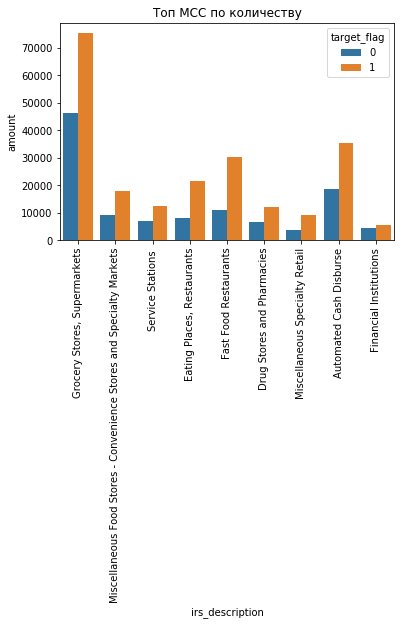

In [139]:
sns.barplot(x="irs_description", y="amount", hue="target_flag", data=top_mcc_by_count)
plt.xticks(rotation=90)
plt.title("Топ MCC по количеству")

Text(0.5,1,'Топ MCC по суммам')

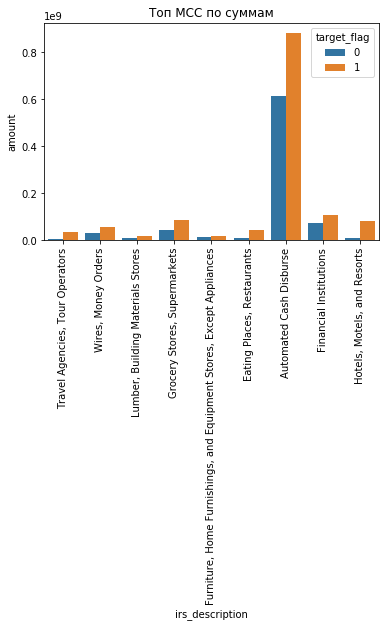

In [140]:
sns.barplot(x="irs_description", y="amount", hue="target_flag", data=top_mcc_by_sum)
plt.xticks(rotation=90)
plt.title("Топ MCC по суммам")

Можно сделать предварительный вывод по визуальному отображению, что сам по себе код MCC не сильно влияет на факт "оттока" клиента

Подготовим предварительный кусочек датасета, в который положим среднюю сумму транзакции в разрезе каждого MCC для каждого клиента, при этом топ определим по сумме (уменьшим порог суммы по сравнению с той, которую мы использовали для визуального анализа)

In [197]:
def get_aggregated_df(df, agg_type, col_to_groupby):
    agg_df = df[['cl_id', col_to_groupby, 'amount']].groupby(['cl_id', col_to_groupby]).agg([agg_type])
    agg_df = agg_df.unstack(fill_value=0)
    agg_df.columns = agg_df.columns.get_level_values(2)

    old_name = agg_df.columns.name
    old_cols = agg_df.columns
    new_cols = [old_name + '_' + agg_type + '_' + str(old_col) for old_col in old_cols]
    agg_df.rename(
        columns={old_col: new_col for old_col, new_col in zip(old_cols, new_cols)}, inplace=True
    )
    return agg_df

In [198]:
mcc_top_by_sum = tuple(mcc_grouped[mcc_grouped[('amount','sum')] > 10000000].
                       sort_values(by=('amount','sum'), ascending=False)['MCC'])
top_mcc_by_sum = raw_df[raw_df['MCC'].isin(mcc_top_by_sum)]
top_mcc_by_sum.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0
5,01/10/2017,1,5814,NaN,810,16OCT17:00:00:00,380.0,POS,0,0.0


In [199]:
top_mcc_mean = get_aggregated_df(top_mcc_by_sum, 'mean', 'MCC')
top_mcc_mean.head() #= top_mcc_by_sum.reset_index().merge(mcc, on = 'MCC', how = 'left')

MCC,MCC_mean_3011,MCC_mean_4112,MCC_mean_4511,MCC_mean_4722,MCC_mean_4812,MCC_mean_4829,MCC_mean_5200,MCC_mean_5211,MCC_mean_5261,MCC_mean_5331,...,MCC_mean_5814,MCC_mean_5912,MCC_mean_5944,MCC_mean_5977,MCC_mean_5999,MCC_mean_6011,MCC_mean_6012,MCC_mean_7011,MCC_mean_8062,MCC_mean_8099
cl_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.000,0.00,0.0,0.000000,5023.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.00,0.000000,20000.000000,36562.000000,0.0,0.0,0.0
1,0.0,0.0,0.000,0.00,0.0,0.000000,23.900000,0.000000,0.0,0.000000,...,2010.760244,813.666667,0.0,1015.00,675.000000,48333.333333,0.000000,0.0,0.0,0.0
5,0.0,943.3,28851.225,7244.49,0.0,0.000000,0.000000,678.000000,0.0,367.000000,...,247.000000,601.333333,3719.0,2101.40,8.200000,9454.545455,4234.797500,1470.0,0.0,0.0
9,0.0,0.0,0.000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.00,440.966296,77142.857143,98983.333333,0.0,0.0,0.0
10,0.0,0.0,0.000,0.00,400.0,1141.731579,342.055556,501.333333,0.0,901.641852,...,502.500000,648.647500,0.0,490.37,149.669506,12939.393939,11923.745000,0.0,0.0,611.0


## Проведём аналогичный анализ по категории расходов trx_category

In [190]:
top_trcat_by_count = raw_df[['trx_category','amount','target_flag']].groupby(['trx_category','target_flag']).agg('count').fillna(0)
top_trcat_by_count = top_trcat_by_count.reset_index()

top_trcat_by_sum = raw_df[['trx_category','amount','target_flag']].groupby(['trx_category','target_flag']).agg('sum').fillna(0)
top_trcat_by_sum = top_trcat_by_sum.reset_index()

Text(0.5,1,'Топ trx_cat по количеству')

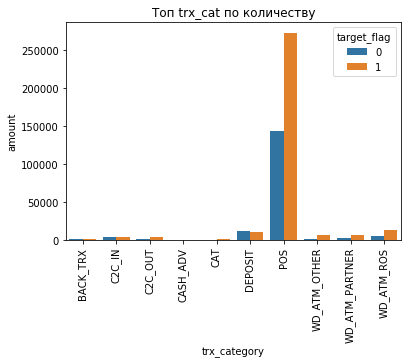

In [192]:
sns.barplot(x="trx_category", y="amount", hue="target_flag", data=top_trcat_by_count)
plt.xticks(rotation=90)
plt.title("Топ trx_cat по количеству")

Пересчитаем без POS, чтобы лучше рассмотреть остальные категории

Text(0.5,1,'Топ trx_cat по количеству')

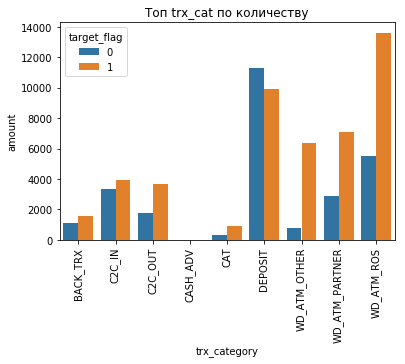

In [195]:
top_trcat_by_count_nopos = top_trcat_by_count[top_trcat_by_count['trx_category']!='POS']
sns.barplot(x="trx_category", y="amount", hue="target_flag", data=top_trcat_by_count_nopos)
plt.xticks(rotation=90)
plt.title("Топ trx_cat по количеству")

Визуально хорошо видно, что клиенты, которые снимали деньги в банкоматах других банков более склонны к оттоку. Правда, снимающие в банкоматах Росбанка также не отличались особой лояльностью.

Text(0.5,1,'Топ trx_cat по сумме')

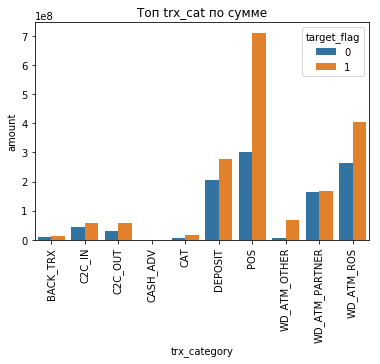

In [193]:
sns.barplot(x="trx_category", y="amount", hue="target_flag", data=top_trcat_by_sum)
plt.xticks(rotation=90)
plt.title("Топ trx_cat по сумме")

In [200]:
top_trcat_mean = get_aggregated_df(raw_df, 'mean', 'trx_category')
top_trcat_mean.head() #= top_mcc_by_sum.reset_index().merge(mcc, on = 'MCC', how = 'left')

trx_category,trx_category_mean_BACK_TRX,trx_category_mean_C2C_IN,trx_category_mean_C2C_OUT,trx_category_mean_CASH_ADV,trx_category_mean_CAT,trx_category_mean_DEPOSIT,trx_category_mean_POS,trx_category_mean_WD_ATM_OTHER,trx_category_mean_WD_ATM_PARTNER,trx_category_mean_WD_ATM_ROS
cl_id,,,,,,,,,,
0,0.0,0.000000,36562.000000,0.0,0.000000,20000.0,2607.000000,0.0,0.0,0.000000
1,0.0,0.000000,0.000000,0.0,0.000000,47500.0,1213.643960,0.0,0.0,50000.000000
5,13990.0,0.000000,4234.797500,0.0,0.000000,32500.0,2617.123874,2750.0,3000.0,4750.000000
9,0.0,98983.333333,0.000000,0.0,0.000000,5000.0,426.382414,0.0,100000.0,87000.000000
10,0.0,10000.000000,1141.731579,0.0,12564.993333,17762.5,537.315802,0.0,1800.0,10828.205128


## также посмотрим распределение в разрезе валюты

In [201]:
top_cur_by_count = raw_df[['currency','amount','target_flag']].groupby(['currency','target_flag']).agg('count').fillna(0)
top_cur_by_count = top_cur_by_count.reset_index()

top_cur_by_sum = raw_df[['currency','amount','target_flag']].groupby(['currency','target_flag']).agg('sum').fillna(0)
top_cur_by_sum = top_cur_by_sum.reset_index()

Text(0.5,1,'валюты по количеству')

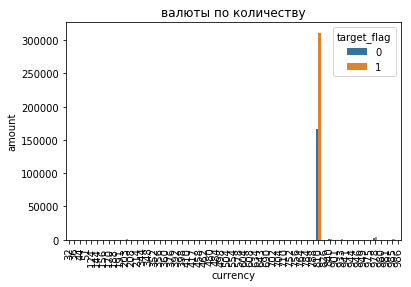

In [204]:
sns.barplot(x="currency", y="amount", hue="target_flag", data=top_cur_by_count)
plt.xticks(rotation=90)
plt.title("валюты по количеству")

неожиданно разных валют оказалось много, поэтому отберём топовые валюты по расходам, отбирать по сумме расходов наверное в этом случае неправильно, т.к. курсы валют разные, предлагается здесь отбирать топ по количеству

In [214]:
cur_grouped = raw_df[
    ['amount', 'currency']
].groupby([ 'currency']).agg(['sum', 'count']).reset_index()

#print (cur_grouped.sort_values(by=('amount','sum'), ascending=True).count())
#всего есть транзакции по 59 валютам
#выберем валюты, которые в топе по количеству транзакции
cur_top_by_count = tuple(cur_grouped[cur_grouped[('amount','count')] > 600].
                         sort_values(by=('amount','count'), ascending=False)['currency'])
len(cur_top_by_count)

3

ожидаемо в топе находится 3 валюты, по графику видно, что одна из них (рубли) с подавляющим превосходством

In [217]:
top_cur_by_sum = raw_df[raw_df['currency'].isin(cur_top_by_count)]
top_cur_by_sum.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [218]:
top_cur_mean = get_aggregated_df(top_cur_by_sum, 'sum', 'currency')
top_cur_mean.head()

currency,currency_sum_810,currency_sum_840,currency_sum_978
cl_id,,,
0,64383.00,0.0,0.00
1,266693.13,0.0,884.91
5,544874.63,0.0,51.83
9,849315.09,0.0,0.00
10,1124343.99,0.0,0.00


Сделаем несколько производных фич на основании даты и времени транзакции

In [224]:
from datetime import datetime

raw_df['TRDATETIME'] = pd.to_datetime(raw_df['TRDATETIME'], format='%d%b%y:%H:%M:%S').copy()
raw_df['TRDATETIME'].head()

0   2017-10-21 00:00:00
1   2017-10-12 12:24:07
2   2017-12-05 00:00:00
3   2017-10-21 00:00:00
4   2017-10-24 13:14:24
Name: TRDATETIME, dtype: datetime64[ns]

Видим, что аналитика по часам в течение дня (например рабочее/внерабочее время) будет не очень показательна, т.к. для большинства строк время не задано

In [239]:
raw_df['TRDATETIME'].dt.hour.groupby(raw_df['TRDATETIME'].dt.hour).agg('count')

TRDATETIME
0     432913
1        252
2        350
3        456
4        660
5        981
6       1315
7       1983
8       2699
9       3635
10      4088
11      4681
12      4707
13      4843
14      4397
15      4120
16      3848
17      3816
18      3659
19      2704
20      1797
21      1268
22       850
23       491
Name: TRDATETIME, dtype: int64

In [299]:
def f_weekend (raw_df):
    if raw_df['TRDATETIME'].dayofyear == 310: #нужно расширить производственным календарём, для учебного примера оставлю с одним праздником
        return 'WEEKEND'
    elif raw_df['TRDATETIME'].weekday == 6 or raw_df['TRDATETIME'].weekday == 7:
        return 'WEEKEND'
    else:
        return 'WORKDAY'

#добавим в качестве параметра является ли день транзакции выходным или рабочим днём
raw_df['weekday'] = raw_df.apply(f_weekend, axis=1)
#добавим в выходные праздник 6 ноября



Посмотрим распределение транзакций по дням месяца (данная фича может быть полезна, чтобы оценить влияние выплаты зарплаты, т.к. в среднем в большинстве случаев она выплачивается в одно и то же время)

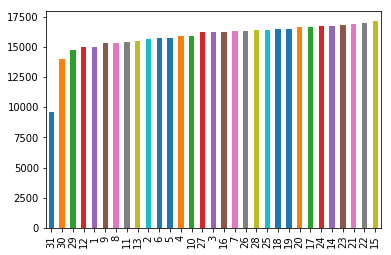

In [295]:
raw_df['TRDATETIME'].dt.day.value_counts().sort_values().plot.bar()

Затруднительно выбрать какой-то период, чтобы сделать его категорией, поэтому оставим данную фичу числом месяца

In [300]:
raw_df['monthday'] = raw_df['TRDATETIME'].dt.day

### Попробуем теперь отфильтровать полученный датасет по топфичам, полученным ранее (по MCC, видам транзакций и валютам)

todo: проверить после этого насколько мы усечём датасет, проверить, не стоит ли туда добавить категорию other в каждую категорию

In [12]:
def transaction_by_day_count(dataset):
    dataset['day_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w')
    ) 
    tmp_df = dataset.groupby(
        ['cl_id','day_of_transaction']
    )['day_of_transaction'].size().unstack().fillna(0).reset_index()
    old_columns = [
        old_col for old_col in tmp_df.columns.tolist()
        if old_col in dataset['day_of_transaction'].unique()
    ]
    tmp_df.rename(
        columns={old_col: 'day_' + old_col for old_col in old_columns},
        inplace=True
    )
    return tmp_df
    
    

def transaction_by_hour_count(dataset):
    dataset['hour_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H')
    ) 
    return dataset.groupby(
        ['cl_id','hour_of_transaction']
    )['hour_of_transaction'].size().unstack().fillna(0).reset_index()

# transaction_by_day_count(raw_df)

### Агрегирование с помощью SQL

In [10]:
import sqlite3
conn = sqlite3.connect('transactions.db')

In [11]:
raw_df.to_sql('transactions_raw', if_exists='replace', con=conn)

In [16]:
check = pd.io.sql.read_sql("""
    select * from transactions_raw limit 100
    """, conn
)

In [17]:
pd.io.sql.read_sql("""
    select count(*), count(distinct cl_id) from transactions_raw
    """, conn
)

,count(*),count(distinct cl_id)
0,490513,5000


In [18]:
MCC_list = raw_df.MCC.value_counts().head(20).index.tolist()
for MCC_code in MCC_list:
    print(
        'sum(case when MCC = {0} then amount else 0 end) as MCC_{0},'.format(MCC_code)
    )

sum(case when MCC = 5411 then amount else 0 end) as MCC_5411,
sum(case when MCC = 6011 then amount else 0 end) as MCC_6011,
sum(case when MCC = 5814 then amount else 0 end) as MCC_5814,
sum(case when MCC = 5812 then amount else 0 end) as MCC_5812,
sum(case when MCC = 5499 then amount else 0 end) as MCC_5499,
sum(case when MCC = 5541 then amount else 0 end) as MCC_5541,
sum(case when MCC = 5912 then amount else 0 end) as MCC_5912,
sum(case when MCC = 5999 then amount else 0 end) as MCC_5999,
sum(case when MCC = 6012 then amount else 0 end) as MCC_6012,
sum(case when MCC = 5921 then amount else 0 end) as MCC_5921,
sum(case when MCC = 5331 then amount else 0 end) as MCC_5331,
sum(case when MCC = 4121 then amount else 0 end) as MCC_4121,
sum(case when MCC = 5211 then amount else 0 end) as MCC_5211,
sum(case when MCC = 4829 then amount else 0 end) as MCC_4829,
sum(case when MCC = 5691 then amount else 0 end) as MCC_5691,
sum(case when MCC = 5261 then amount else 0 end) as MCC_5261,
sum(case

In [19]:
datamart_check = pd.io.sql.read_sql("""
    select
        cl_id,
        target_flag,
        sum(case when MCC = 5411 then amount else 0 end) as MCC_5411,
        sum(case when MCC = 6011 then amount else 0 end) as MCC_6011,
        sum(case when MCC = 5814 then amount else 0 end) as MCC_5814,
        sum(case when MCC = 5812 then amount else 0 end) as MCC_5812,
        sum(case when MCC = 5499 then amount else 0 end) as MCC_5499,

/*------------------average amount---------------------------------*/
        avg(case when MCC = 5411 then amount else 0 end) as MCC_5411_avg,
        avg(case when MCC = 6011 then amount else 0 end) as MCC_6011_avg,
        avg(case when MCC = 5814 then amount else 0 end) as MCC_5814_avg,
        avg(case when MCC = 5812 then amount else 0 end) as MCC_5812_avg,
        avg(case when MCC = 5499 then amount else 0 end) as MCC_5499_avg
    from transactions_raw
    group by 1, 2
    order by 1
    """, conn)

In [20]:
datamart_check

,cl_id,target_flag,MCC_5411,MCC_6011,MCC_5814,MCC_5812,MCC_5499,MCC_5411_avg,MCC_6011_avg,MCC_5814_avg,MCC_5812_avg,MCC_5499_avg
0,0,0,2031.00,20000.0,0.00,0.00,0.00,406.200000,4000.000000,0.000000,0.000000,0.000000
1,1,0,14629.46,145000.0,82441.17,3180.01,492.80,140.667885,1394.230769,792.703558,30.577019,4.738462
2,5,1,44925.40,208000.0,247.00,3309.00,7196.70,316.376056,1464.788732,1.739437,23.302817,50.680986
3,9,0,39.00,540000.0,0.00,0.00,0.00,1.000000,13846.153846,0.000000,0.000000,0.000000
4,10,0,53920.36,854000.0,2010.00,319.00,13225.02,116.458661,1844.492441,4.341253,0.688985,28.563758
5,11,0,31084.62,182000.0,5653.00,11814.80,383.60,143.247097,838.709677,26.050691,54.446083,1.767742
6,14,1,20408.96,37000.0,23894.06,5659.00,827.00,150.065882,272.058824,175.691618,41.610294,6.080882
7,20,0,9834.43,215000.0,0.00,3023.33,1247.73,127.719870,2792.207792,0.000000,39.264026,16.204286
8,21,0,25978.04,65000.0,4853.00,7540.00,1277.45,209.500323,524.193548,39.137097,60.806452,10.302016
9,22,0,241.82,139000.0,0.00,0.00,2610.00,4.098644,2355.932203,0.000000,0.000000,44.237288
